# Exploratory Data Analysis: Bikes

## Libraries and dataframe

In [65]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pandas.read_csv('../Datasets/bike.csv')

### Columns
***weathersit***

    1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

NA *ordinal* ***instant***: record index 

NA *ordinal* ***dteday***: date

NA *category* ***season***: season (1:spring, 2:summer, 3:fall, 4:winter)

NA *category* ***yr***: year (0: 2011, 1:2012)

NA *category* ***mnth***: month ( 1 to 12)

*category* ***holiday***: whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday- schedule)

NA *category* ***weekday***: day of the week

*category* ***workingday***: if the day is a regular day of work it is coded as 1, weekends or holidays are coded as 0.

*numerical* ***temp***: Normalized temperature in Celsius. The values are divided by 41 (max)

*numerical* ***atemp***: Normalized feeling temperature in Celsius. The values are divided by 50 (max)

*numerical* ***hum***: Normalized humidity. The values are divided by 100 (max)

*numerical* ***windspeed***: Normalized wind speed. The values are divided by 67 (max)

*numerical* ***casual***: count of casual users

*numerical* ***registered***: count of registered users

*numerical* ***cnt***: count of total rental bikes including both casual and registered users

NA: We're not analysing those variables alone

https://rstudio-pubs-static.s3.amazonaws.com/98994_613e4a13f448452c937233f146f80d59.html

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Specific numerical features

In [67]:
toAnalyse = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

## Statistical Metrics
- Min
- Max
- Mean
- Standard Deviation
- Normal min
- Normal max
- Q1 
- Q2 (median)
- Q3
- IQR

In [6]:
def stats(x):
    r = x.describe().to_dict()
    r['IQR'] = r['75%'] - r['25%']
    r['minN'] = r['25%'] - r['IQR']*1.5
    r['maxN'] = r['75%'] + r['IQR']*1.5
    return r

In [79]:
for c in toAnalyse:
    print('\n\t', c)
    st = stats(df[c])
    for i in st:
        print(i, ' =\t', st[i], sep = '')


	 temp
count =	731.0
mean =	0.49538478850889184
std =	0.18305099611148867
min =	0.0591304
25% =	0.3370835
50% =	0.498333
75% =	0.6554165000000001
max =	0.861667
IQR =	0.3183330000000001
minN =	-0.14041600000000015
maxN =	1.1329160000000003

	 atemp
count =	731.0
mean =	0.47435398864569067
std =	0.16296117838631127
min =	0.0790696
25% =	0.3378425
50% =	0.486733
75% =	0.6086020000000001
max =	0.840896
IQR =	0.2707595000000001
minN =	-0.06829675000000018
maxN =	1.0147412500000002

	 hum
count =	731.0
mean =	0.6278940629274962
std =	0.14242909513835394
min =	0.0
25% =	0.52
50% =	0.626667
75% =	0.7302085
max =	0.9725
IQR =	0.21020850000000002
minN =	0.20468725
maxN =	1.0455212500000002

	 windspeed
count =	731.0
mean =	0.1904862116279068
std =	0.07749787068166943
min =	0.0223917
25% =	0.13495
50% =	0.180975
75% =	0.2332145
max =	0.507463
IQR =	0.0982645
minN =	-0.012446750000000034
maxN =	0.38061125

	 casual
count =	731.0
mean =	848.1764705882352
std =	686.6224882846549
min =	2.0
25% =	31

## Histogram and Boxplot
*Bar graph will be used to see frequency of categorical features.*

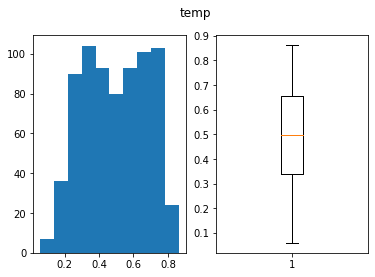

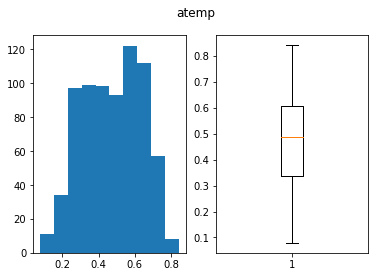

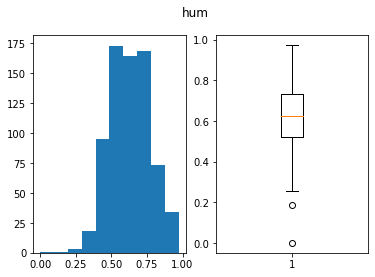

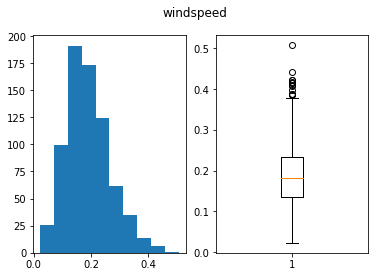

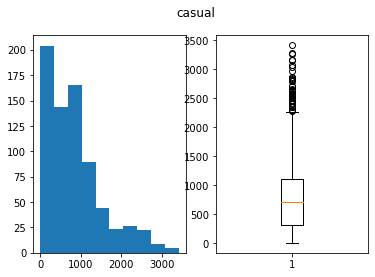

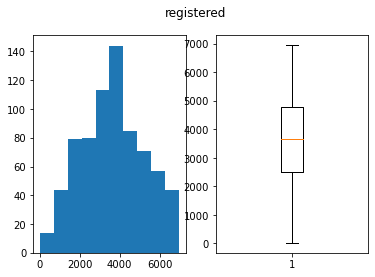

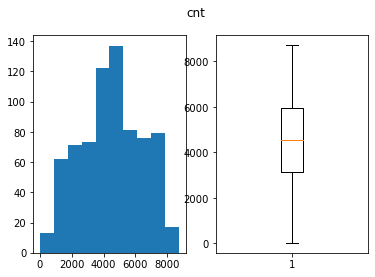

In [81]:
for feature in toAnalyse:
    plt.figure()
    plt.suptitle(feature)
    plt.subplot(1, 2, 1)
    plt.hist(df[feature].values)
    plt.subplot(1, 2, 2)
    plt.boxplot(df[feature].values)
    plt.show()

*0 for normal days.*

*1 for holidays.*

<AxesSubplot:xlabel='holiday', ylabel='count'>

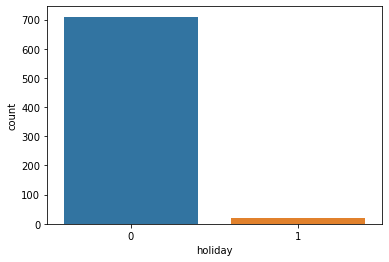

In [56]:
sns.countplot(data = df, x = 'holiday')

*0 for non-working days.*

*1 for normal, working days.*

<AxesSubplot:xlabel='workingday', ylabel='count'>

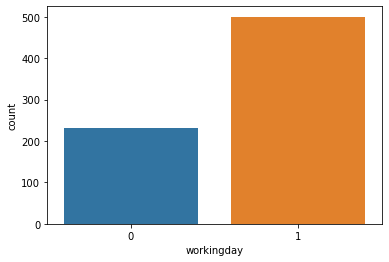

In [54]:
sns.countplot(data = df, x = 'workingday')

<AxesSubplot:xlabel='weathersit', ylabel='count'>

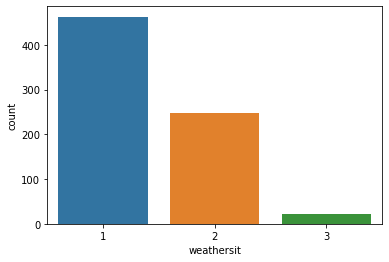

In [84]:
sns.countplot(data = df, x = 'weathersit')

*1: spring*
 
*2: summer*
 
*3: fall*
 
*4: winter*

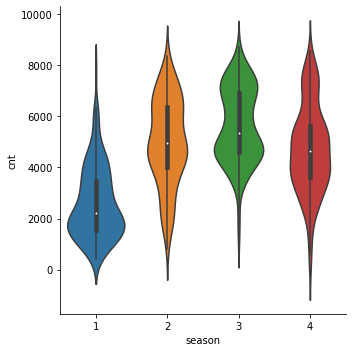

In [95]:
sns.catplot(data = df, x = 'season', y = 'cnt', kind='violin')

## Correlation Matrix

In [27]:
dfAnalysis = df[[*toAnalyse, 'yr']]
dfC = dfAnalysis.corr()
dfAbs = pandas.DataFrame(np.round(np.abs(dfC.values), 2), index = dfC.index, columns = dfC.columns)

In [28]:
dfC

,temp,atemp,hum,windspeed,casual,registered,cnt,yr
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.047604
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.046106
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,-0.110651
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545,-0.011817
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804,0.248546
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517,0.594248
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000,0.566710
yr,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,1.000000


### Absolute Values

#### Correlation matrix absolute values

In [29]:
dfAbs

,temp,atemp,hum,windspeed,casual,registered,cnt,yr
temp,1.00,0.99,0.13,0.16,0.54,0.54,0.63,0.05
atemp,0.99,1.00,0.14,0.18,0.54,0.54,0.63,0.05
hum,0.13,0.14,1.00,0.25,0.08,0.09,0.10,0.11
windspeed,0.16,0.18,0.25,1.00,0.17,0.22,0.23,0.01
casual,0.54,0.54,0.08,0.17,1.00,0.40,0.67,0.25
registered,0.54,0.54,0.09,0.22,0.40,1.00,0.95,0.59
cnt,0.63,0.63,0.10,0.23,0.67,0.95,1.00,0.57
yr,0.05,0.05,0.11,0.01,0.25,0.59,0.57,1.00


#### Colored correlation matrix absolute values

<AxesSubplot:>

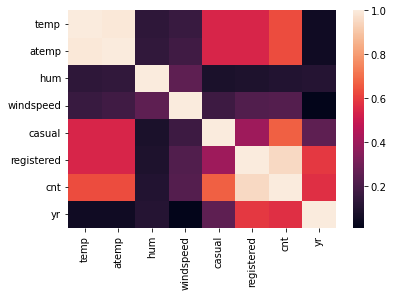

In [96]:
sns.heatmap(dfAbs)

## Scatterplot with cnt

### Against temperature, the most correlationed feature with cnt

<AxesSubplot:xlabel='temp', ylabel='cnt'>

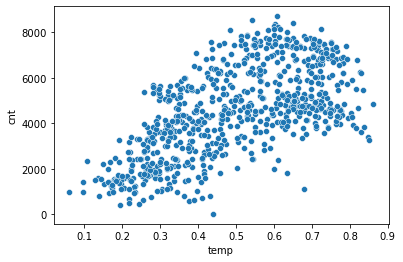

In [97]:
sns.scatterplot(data = df, x = 'temp', y = 'cnt')

### Against humidity, the least correlationed feature with cnt

<AxesSubplot:xlabel='hum', ylabel='cnt'>

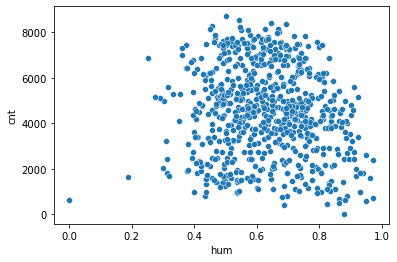

In [43]:
sns.scatterplot(data = df, x = 'hum', y = 'cnt')

## Scatterplot: Four features

<AxesSubplot:xlabel='temp', ylabel='cnt'>

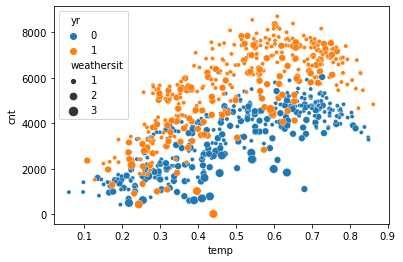

In [98]:
sns.scatterplot(data = df, x = 'temp', y = 'cnt', hue = 'yr', size = 'weathersit')

## Insights

> ### The company grew a lot from 2011 to 2012

With a scatter plot is possible to compare the same months from both years and it is pretty evident the fact that 2012 (smaller bubble, the orange one) had way more customers than 2011 did.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

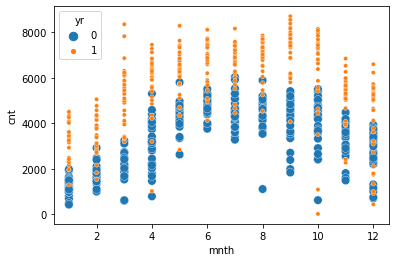

In [105]:
sns.scatterplot(data = df, x = 'mnth', y = 'cnt', hue = 'yr', size = 'yr')

If we actually calculate the number of customers in every year, we can see that 2011 had almost half the people that 2012 got.

In [31]:
fstYrFilter = df['yr'] == 0
secYrFilter = df['yr'] == 1
fstYrTotal = df['cnt'][fstYrFilter].sum()
print('First Year Total:', fstYrTotal)
secYrTotal = df['cnt'][secYrFilter].sum()
print('Second Year Total:', secYrTotal)

First Year population: 1243103
Second Year population: 2049576


> ### The weather situation has a lot of impact in the quantity of customers

We can aprecciate that every month always has the 'relax', 'most comfortable', weather situation at the top of the graph.

And more dangerous days are at the bottom, probably because people don't tend to go out on those days.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

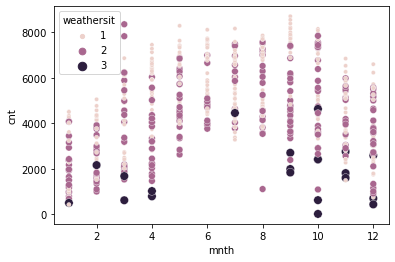

In [109]:
sns.scatterplot(data = df, x = 'mnth', y = 'cnt', hue = 'weathersit', size = 'weathersit')

> ### Spring is not a strong season

The following catplot shows that spring is the season with less rent of bikes of the year.

A strategy to attract more people during those days could be necessary.

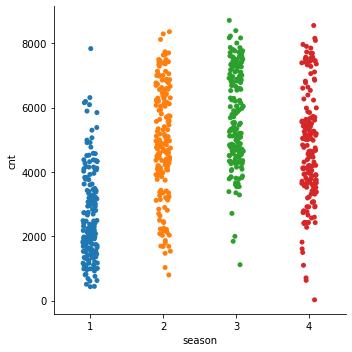

In [120]:
sns.catplot(data = df, x = 'season', y = 'cnt')

> ### Casual users are minority

Casual users compared to registered users represent only a small ratio of the daily rental.

This means that the impact on the 'cnt' feature is tiny, that's why a low correlation was shown in the matrix.

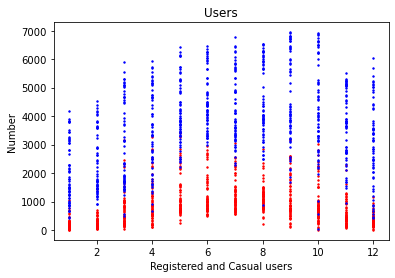

In [137]:
plt.figure()
plt.title('Users')
plt.xlabel('Registered and Casual users')
plt.ylabel('Number')
plt.scatter(df['mnth'].values, df['casual'].values, color = 'red', s = 2)
plt.scatter(df['mnth'].values, df['registered'].values, color = 'blue', s = 2)
plt.show()